# Laboration - skolstatistik

## Uppgift 0 - uppvärmning med riket

### a)

In [26]:
import pandas as pd

[df_math, df_english, df_swedish, df_sfi] = [
    pd.read_excel("./data/riket2023_åk9_np.xlsx", sheet_name=sheet, skiprows=8)
    for sheet in ["Matematik", "Engelska", "Svenska", "Svenska som andraspråk"]
]

for df in [df_math, df_english, df_swedish, df_sfi]:
    df.columns = [
        "Plats",
        "Huvudman",
        "Totalt (A-F)",
        "Flickor (A-F)",
        "Pojkar (A-F)",
        "Totalt (A-E)",
        "Flickor (A-E)",
        "Pojkar (A-E)",
        "Totalt (poäng)",
        "Flickor (poäng)",
        "Pojkar (poäng)",
    ]

df_sfi

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963,5495,6468,75.9,80,72.4,9,9.9,8.3
2,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12,10.4
3,Riket,Skolverket,..,..,..,..,..,..,..,..,..


### b)

In [25]:
[total_f, girls_f, boys_f] = [
    int(df_math.at[0, f"{name} (A-F)"] * ((100 - df_math.at[0, f"{name} (A-E)"]) / 100))
    for name in ["Totalt", "Flickor", "Pojkar"]
]

total_f, girls_f, boys_f

(11637, 5824, 5797)

### c)

Text(0.5, 1.0, 'Totala poäng för ämnena: Engelska, Matematik,\nSvenska, Svenska som andraspråk')

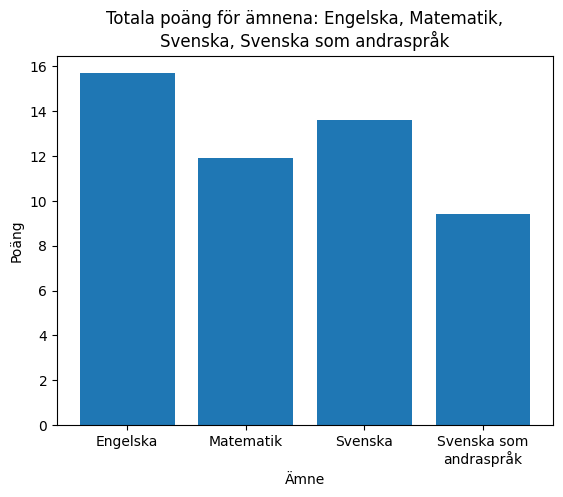

In [44]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["Engelska", "Matematik", "Svenska", "Svenska som\nandraspråk"])
y = np.array(
    [df.at[0, "Totalt (poäng)"] for df in [df_english, df_math, df_swedish, df_sfi]]
)


plt.bar(x, y)
plt.xlabel("Ämne")
plt.ylabel("Poäng")
plt.title(
    "Totala poäng för ämnena: Engelska, Matematik,\nSvenska, Svenska som andraspråk"
)